In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

file_list = os.listdir("./mean_std_result")

jensonshanon_result_file_list = []

for file in file_list:
    if 'mean_std_result' in file:
        jensonshanon_result_file_list.append(file)

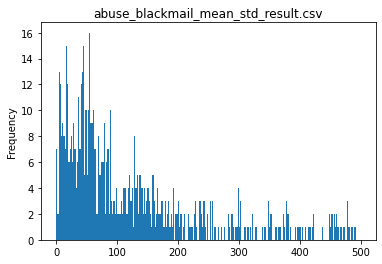

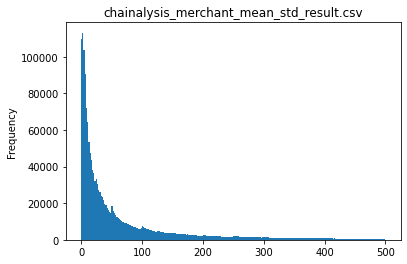

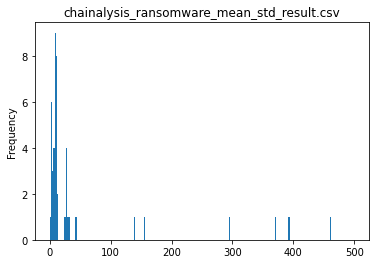

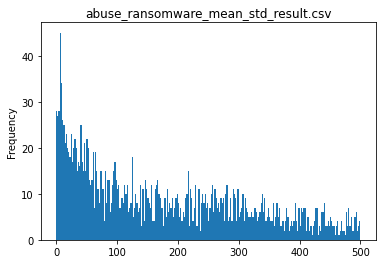

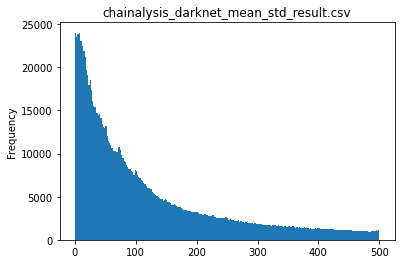

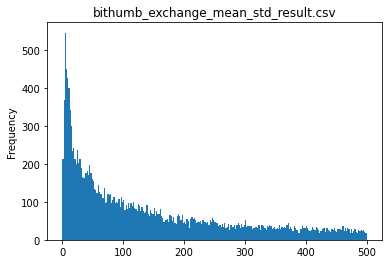

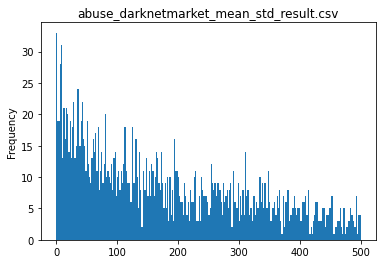

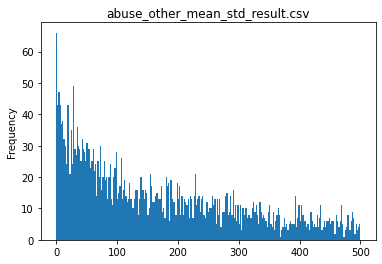

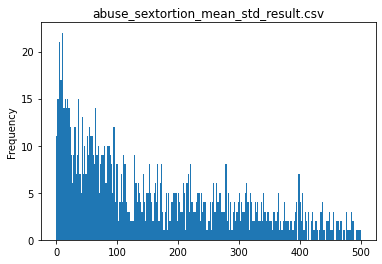

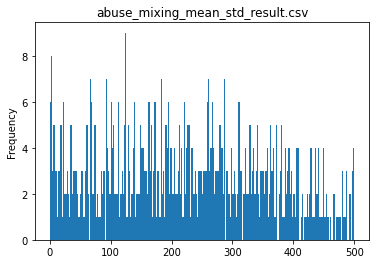

In [20]:
for file in jensonshanon_result_file_list:
    jenson_data = pd.read_csv(f"./mean_std_result/{file}", header=None)
    jenson_data.columns = ['Address' ,'mean', 'std']
    # mean_data = jenson_data.loc[jenson_data['mean'] > jenson_data['std']]
    mean_data = jenson_data['mean']
    histogram = mean_data.plot.hist(bins = 250, range = [0, 500])
    plt.title(file)
    plt.show()

abuse_blackmail | Max USD: 17.0 | Max USD Frequency: 8.0 percentage : 1.8604651162790697 | DATA LENGTH : 430
chainalysis_merchant | Max USD: 3.0 | Max USD Frequency: 48256.0 percentage : 3.4907003391164455 | DATA LENGTH : 1382416
chainalysis_ransomware | Max USD: 8.0 | Max USD Frequency: 8.0 percentage : 8.16326530612245 | DATA LENGTH : 98
abuse_ransomware | Max USD: 7.0 | Max USD Frequency: 19.0 percentage : 1.0337323177366704 | DATA LENGTH : 1838
chainalysis_darknet | Max USD: 0.0 | Max USD Frequency: 10553.0 percentage : 0.9549068257785934 | DATA LENGTH : 1105134
bithumb_exchange | Max USD: 4.0 | Max USD Frequency: 284.0 percentage : 1.4674727432439414 | DATA LENGTH : 19353
abuse_darknetmarket | Max USD: 0.0 | Max USD Frequency: 23.0 percentage : 1.31956397016638 | DATA LENGTH : 1743
abuse_other | Max USD: 0.0 | Max USD Frequency: 36.0 percentage : 1.2032085561497325 | DATA LENGTH : 2992
abuse_sextortion | Max USD: 5.0 | Max USD Frequency: 13.0 percentage : 1.5186915887850467 | DATA

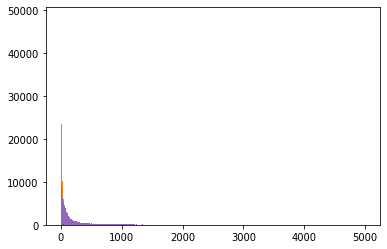

In [18]:
for file in jensonshanon_result_file_list:
    jenson_data = pd.read_csv(f"./mean_std_result/{file}", header=None)
    jenson_data.columns = ['Address' ,'mean', 'std']
    mean_data = jenson_data.loc[jenson_data['mean'] > jenson_data['std']]
    mean_data = mean_data['mean']
    y, x, _ = plt.hist(mean_data ,bins = 5000, range = [0, 5000])
    file_names = file.split("_")
    for x_value, y_value in zip(x, y):
        if y_value == y.max():
            print(file_names[0]+"_"+file_names[1], "| Max USD"+": "+str(x_value), "| Max USD Frequency"+ ": "+ str(y_value) + " percentage : "+ str(y_value / len(mean_data) * 100), "| DATA LENGTH : " + str(len(mean_data)) )
            break